In [1]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import random
import itertools
import numpy as np
import pickle

In [2]:
path = 'data.txt'
unk = 'unk'
vocab_size = 6_000
whitelist = '0123456789abcdefghijklmnopqrstuvwxyz '
sizes = {
    'maxq': 20,
    'maxa': 50,
    'minq': 0,
    'mina': 2,
}

In [3]:
def read_lines(filename):
	return open(filename, 'r', encoding='utf8').read().split('\n')[:-1]

In [4]:
def filter_line(line, whitelist):
	return ''.join([ ch for ch in line if ch in whitelist])

In [5]:
def filter_size(sequences):
    filtered_q, filtered_a = [], []

    for i in range(0, len(sequences), 2):
        qlen, alen = len(word_tokenize(sequences[i])) , len(word_tokenize(sequences[i+1]))
        if (qlen >= sizes['minq'] and qlen <= sizes['maxq']):
            if (alen >= sizes['mina'] and alen <= sizes['maxa']):
                filtered_q.append(sequences[i])
                filtered_a.append(sequences[i+1])
    
    return filtered_q, filtered_a

In [6]:
def indexing(tokenized_sentences, vocab_size):
    freq_dist = nltk.FreqDist(itertools.chain(*tokenized_sentences))
    vocab = freq_dist.most_common(vocab_size)

    index2word = ['_'] + [unk] + [word[0] for word in vocab]
    word2index = dict([(w,i) for i,w in enumerate(index2word)])

    return index2word, word2index, freq_dist

In [7]:
def pad_seq(sequence, w2i, max):
    sentence = []
    for word in sequence:
        if word in w2i:
            sentence.append(w2i[word])
        else:
            sentence.append(w2i[unk])
    return sentence + [0] * (max - len(sentence))

In [8]:
def zero_pad(qtokenized, atokenized, w2idx):
	# num of rows
	data_len = len(qtokenized)

	# numpy arrays to store indices
	idx_q = np.zeros([data_len, sizes['maxq']], dtype=np.int32)
	idx_a = np.zeros([data_len, sizes['maxa']], dtype=np.int32)

	for i in range(data_len):
		q_indices = pad_seq(qtokenized[i], w2idx, sizes['maxq'])
		a_indices = pad_seq(atokenized[i], w2idx, sizes['maxa'])
		idx_q[i] = np.array(q_indices)
		idx_a[i] = np.array(a_indices)

	return idx_q, idx_a

In [9]:
def remove_stopwords(line):
	stop_words = set(stopwords.words('english')) 
	word_tokens = word_tokenize(line) 
	  
	# filtered_sentence = [w for w in word_tokens if not w in stop_words] 
	filtered_sentence = []   
	for w in word_tokens: 
		if w not in stop_words: 
			filtered_sentence.append(w) 
	
	return ' '.join(filtered_sentence)

In [16]:
#start processing data
def process_data():
    
    lines = read_lines(path)
    tokenized_data = []
    
    #droping unnecessary chars 
    filtered_lines = [filter_line(line.lower(), whitelist) for line in lines] 
    print(f'filtered data with len ====== {len(filtered_lines)}')
    print(filtered_lines[100:104])

    # filtered_lines = [ remove_stopwords(line) for line in filtered_lines ]

    #filtering based on len droping too long or too short 
    print('2nd filtering')
    filtered_q, filtered_a = filter_size(filtered_lines) 
    print(f'{filtered_q[0]} >>>>> {filtered_a[0]}')


    
    #tokenizing sentences
    tokenized_q = [word_tokenize(line) for line in filtered_q]
    tokenized_a = [word_tokenize(line) for line in filtered_a]
    print('Sample from segmented list of words')
    print(f'{tokenized_q[0]} >>>>> {tokenized_a[0]}')
    
    #indexing
    print('>> indexing')
    idx2w , w2idx, freq = indexing(tokenized_q + tokenized_a, vocab_size)

    freq.plot(20)
    print(f'lenght is : {w2idx}')

    
    #padding our tokinzed sentecnes
    print('>>> padding')
    idx_q, idx_a = zero_pad(tokenized_q, tokenized_a, w2idx)
    print(f'first sentence: {idx_a[0]} >>>> {idx_a.shape}')

    #sabe our sentence's indexs and some meatada
    np.save('idx_q.npy', idx_q)
    np.save('idx_a.npy', idx_a)

    metadata = {
			'w2idx' : w2idx,
			'idx2w' : idx2w,
			'limit' : sizes,
			'freq_dist' : freq
				}
    with open('metadata.pkl', 'wb') as f:
        pickle.dump(metadata, f)
    return idx_q , idx_a, metadata

filtered data with len ====== 5510
['what is polygon triangularisation ', 'decompose a polygon into a set of triangles', 'what is children of tree', 'children of a node the roots of the subtrees of a node are called the children of the node in figure 7 and 3 are children of node 1']
2nd filtering
how does randomised algorithm work >>>>> the algorithm typically uses uniformly random bits as an auxiliary input to guide its behavior in the hope of achieving good performance in the average case over all possible choices of random bits 
Sample from segmented list of words
['how', 'does', 'randomised', 'algorithm', 'work'] >>>>> ['the', 'algorithm', 'typically', 'uses', 'uniformly', 'random', 'bits', 'as', 'an', 'auxiliary', 'input', 'to', 'guide', 'its', 'behavior', 'in', 'the', 'hope', 'of', 'achieving', 'good', 'performance', 'in', 'the', 'average', 'case', 'over', 'all', 'possible', 'choices', 'of', 'random', 'bits']
>> indexing


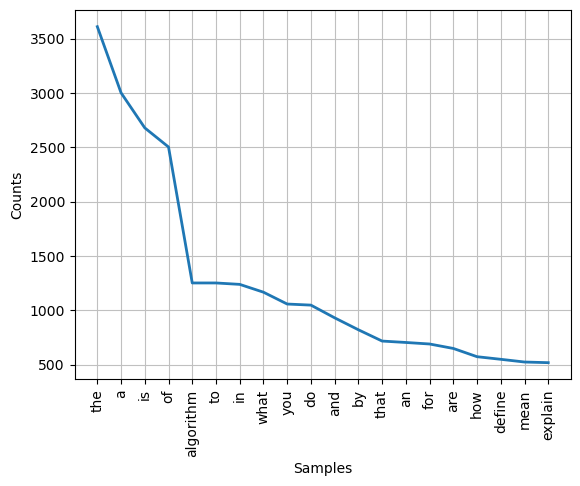

lenght is : {'_': 0, 'unk': 1, 'the': 2, 'a': 3, 'is': 4, 'of': 5, 'algorithm': 6, 'to': 7, 'in': 8, 'what': 9, 'you': 10, 'do': 11, 'and': 12, 'by': 13, 'that': 14, 'an': 15, 'for': 16, 'are': 17, 'how': 18, 'define': 19, 'mean': 20, 'explain': 21, 'it': 22, 'or': 23, 'process': 24, 'tree': 25, 'search': 26, 'system': 27, 'time': 28, 'sort': 29, 'as': 30, 'which': 31, 'graph': 32, 'data': 33, 'be': 34, 'with': 35, 'this': 36, 'node': 37, 'list': 38, 'memory': 39, 'operating': 40, 'can': 41, 'called': 42, 'used': 43, 'one': 44, 'binary': 45, 'on': 46, 'between': 47, 'algorithms': 48, 'case': 49, 'from': 50, 'not': 51, 'set': 52, 'method': 53, 'when': 54, 'two': 55, 'each': 56, 'at': 57, 'kernel': 58, 'all': 59, 'problem': 60, 'nodes': 61, 'its': 62, 'number': 63, 'path': 64, 'program': 65, 'also': 66, 'order': 67, 'sorting': 68, 'address': 69, 'other': 70, 'bubble': 71, 'processes': 72, 'space': 73, 'any': 74, 'performance': 75, 'where': 76, 'linear': 77, 'if': 78, 'cpu': 79, 'state': 

In [17]:
q,a , idx2w= process_data()

In [12]:
def load_data(path=''):
	with open(path + 'metadata.pkl', 'rb') as f:
		metadata = pickle.load(f)
        
	idx_q = np.load(path + 'idx_q.npy', encoding = 'latin1')
	idx_a = np.load(path + 'idx_a.npy', encoding = 'latin1')
	return metadata, idx_q, idx_a

In [18]:
idx2w

{'w2idx': {'_': 0,
  'unk': 1,
  'the': 2,
  'a': 3,
  'is': 4,
  'of': 5,
  'algorithm': 6,
  'to': 7,
  'in': 8,
  'what': 9,
  'you': 10,
  'do': 11,
  'and': 12,
  'by': 13,
  'that': 14,
  'an': 15,
  'for': 16,
  'are': 17,
  'how': 18,
  'define': 19,
  'mean': 20,
  'explain': 21,
  'it': 22,
  'or': 23,
  'process': 24,
  'tree': 25,
  'search': 26,
  'system': 27,
  'time': 28,
  'sort': 29,
  'as': 30,
  'which': 31,
  'graph': 32,
  'data': 33,
  'be': 34,
  'with': 35,
  'this': 36,
  'node': 37,
  'list': 38,
  'memory': 39,
  'operating': 40,
  'can': 41,
  'called': 42,
  'used': 43,
  'one': 44,
  'binary': 45,
  'on': 46,
  'between': 47,
  'algorithms': 48,
  'case': 49,
  'from': 50,
  'not': 51,
  'set': 52,
  'method': 53,
  'when': 54,
  'two': 55,
  'each': 56,
  'at': 57,
  'kernel': 58,
  'all': 59,
  'problem': 60,
  'nodes': 61,
  'its': 62,
  'number': 63,
  'path': 64,
  'program': 65,
  'also': 66,
  'order': 67,
  'sorting': 68,
  'address': 69,
  'other

In [14]:
sentence = [idx2w[w] for w in a[1]]
print(sentence)


['bestfirst', 'search', 'is', 'a', 'search', 'algorithm', 'which', 'explores', 'a', 'graph', 'by', 'expanding', 'the', 'most', 'promising', 'node', 'chosen', 'according', 'to', 'a', 'specified', 'rule', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_', '_']
